<a href="https://colab.research.google.com/github/bernaldiaz/bernaldiaz/blob/main/orbitacompletaF3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ahora la orbita completa

In [33]:
import matplotlib.pyplot as plt
import numpy as np

In [34]:
def calcular_fuerza_gravitacional(m1, m2, r):
    G = 1.0
    fuerza = G * (m1 * m2) / (r**2)
    return fuerza

def calcular_aceleracion(fuerza, masa):
    aceleracion = fuerza / masa
    return aceleracion

In [35]:
def actualizar_posicion_polar(radio, angulo, velocidad, tiempo, aceleracion):
    # Convertir coordenadas polares a cartesianas
    nueva_x = radio * np.cos(angulo) + velocidad * tiempo * np.cos(angulo)
    nueva_y = radio * np.sin(angulo) + velocidad * tiempo * np.sin(angulo)

    # Actualizar la velocidad y el ángulo
    nueva_velocidad = velocidad + aceleracion * tiempo
    nuevo_angulo = angulo + nueva_velocidad * tiempo / radio

    return nueva_x, nueva_y, nueva_velocidad, nuevo_angulo

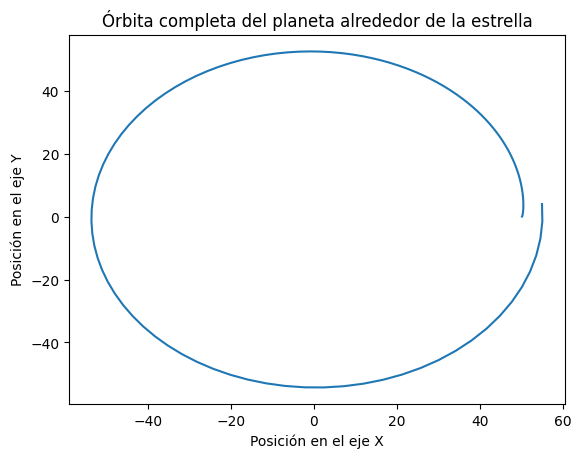

In [36]:
def simular_orbita(masa_estrella, masa_planeta, radio_inicial, velocidad_inicial, tiempo_simulacion, paso_tiempo):
    # Condiciones iniciales
    radio_planeta = radio_inicial
    angulo_planeta = 0.0
    velocidad_planeta = velocidad_inicial

    # Listas para almacenar las posiciones en cada paso de tiempo
    posiciones_x = []
    posiciones_y = []

    # Simulación
    for _ in np.arange(0, tiempo_simulacion, paso_tiempo):
        # Calcular la distancia entre el planeta y la estrella
        distancia = radio_planeta

        # Calcular la fuerza gravitacional
        fuerza_gravitacional = calcular_fuerza_gravitacional(masa_estrella, masa_planeta, distancia)

        # Calcular la aceleración del planeta
        aceleracion = calcular_aceleracion(fuerza_gravitacional, masa_planeta)

        # Actualizar la posición del planeta en coordenadas polares
        nueva_x, nueva_y, velocidad_planeta, angulo_planeta = actualizar_posicion_polar(radio_planeta, angulo_planeta, velocidad_planeta, paso_tiempo, aceleracion)

        # Almacenar las posiciones en las listas
        posiciones_x.append(nueva_x)
        posiciones_y.append(nueva_y)

    return posiciones_x, posiciones_y

# Parámetros de la simulación
masa_estrella = 1000000
masa_planeta = 1
radio_inicial = 50
velocidad_inicial = 2 * np.pi  # Velocidad angular inicial para una órbita circular
tiempo_simulacion = 1.25
paso_tiempo = 0.01

# Realizar la simulación
posiciones_x, posiciones_y = simular_orbita(masa_estrella, masa_planeta, radio_inicial, velocidad_inicial, tiempo_simulacion, paso_tiempo)

# Visualizar la órbita
plt.plot(posiciones_x, posiciones_y)
plt.title('Órbita completa del planeta alrededor de la estrella')
plt.xlabel('Posición en el eje X')
plt.ylabel('Posición en el eje Y')
plt.show()